In [10]:
from skimage.io import imshow, imread, imsave
from skimage import img_as_float
import numpy

def align(img, g_coord):
    row_g, col_g = g_coord
    
    # считаем сдвиги каналов
    img_f = img_as_float(img)
    rot = img_f.shape[0] // 3
    img_b = img_f[0:rot, :]
    img_g = img_f[rot:rot * 2, :]
    img_r = img_f[rot * 2:rot*3,:]


    img_b = img_b[int(img_b.shape[0] * 0.1):int(img_b.shape[0] * 0.9), 
                  int(img_b.shape[1] * 0.1):int(img_b.shape[1] * 0.9)]
    img_g = img_g[int(img_g.shape[0] * 0.1):int(img_g.shape[0] * 0.9),
                  int(img_g.shape[1] * 0.1):int(img_g.shape[1] * 0.9)]
    img_r = img_r[int(img_r.shape[0] * 0.1):int(img_r.shape[0] * 0.9), 
                  int(img_r.shape[1] * 0.1):int(img_r.shape[1] * 0.9)]

    
    correlation_blue = []
    for row_shift in range(-15, 16):
        for col_shift in range(-15, 16):
            img_shifted = numpy.roll(img_b, row_shift, axis=0)
            img_shifted = numpy.roll(img_shifted, col_shift, axis=1)
            correlation_blue.append(((img_g * img_shifted).sum(), row_shift, col_shift))
   
    max_corr_blue = 0
    for item in correlation_blue:
        if item[0] > max_corr_blue:
            max_corr_blue = item[0]
            sh_r_blue = item[1]
            sh_c_blue = item[2]
    
    correlation_red = []
    for row_shift in range(-15, 16):
        for col_shift in range(-15, 16):
            img_shifted = numpy.roll(img_r, row_shift, axis=0)
            img_shifted = numpy.roll(img_shifted, col_shift, axis=1)
            correlation_red.append(((img_g * img_shifted).sum(), row_shift, col_shift))
            
    max_corr_red = 0
    for item in correlation_red:
        if item[0] > max_corr_red:
            max_corr_red = item[0]
            sh_r_red = item[1]
            sh_c_red = item[2]
    
    img_shifted_blue = numpy.roll(img_b, sh_r_blue, axis=0)
    img_shifted_blue = numpy.roll(img_shifted_blue, sh_c_blue, axis=1)
    img_shifred_red = numpy.roll(img_r, sh_r_red, axis=0)
    img_shifted_red = numpy.roll(img_shifred_red, sh_c_red, axis=1)
    
    row_b_ = row_g - (img_f.shape[0] // 3)

    row_r_ = row_g + (img_f.shape[0] // 3)

    
    row_b = row_b_ - sh_r_blue
    col_b = col_g - sh_c_blue
    row_r = row_r_ - sh_r_red
    col_r = col_g - sh_c_red
    
    imshow(numpy.dstack((img_shifted_red, img_g, img_shifted_blue)))

    
    # сдвигаем точку на зеленом канале
    # на другие каналы
    return (row_b, col_b), (row_r, col_r)

((161, 237), (854, 238))

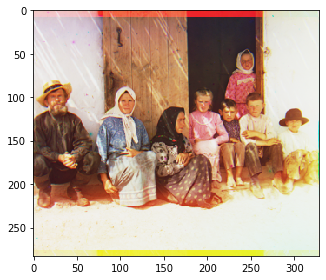

In [13]:
img = imread("https://stepik.org/media/attachments/lesson/58182/07.png")
align(img, (508, 237))

((153, 236), (857, 238))

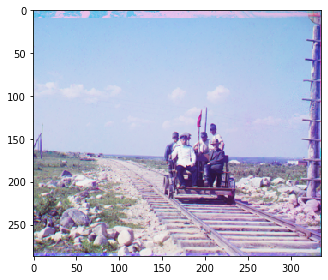

In [12]:
img = imread("https://stepik.org/media/attachments/lesson/58182/00.png")
align(img, (508, 237))

In [14]:
img.shape

(1064, 412)